In [1]:
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # default library for making plots
import seaborn as sns # for making prettier plots!
import datetime
import math

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

#### Load Data

In [47]:
data = pd.read_csv("fitbit_data.csv")

In [49]:
data

,Date,Weight,BMI,Fat,Calories In,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,25/03/2020,93.28,28.79,20,0,3669,16341,13.40,66,695,211,13,75,2008,375,71,28,446,82,207,86
1,26/03/2020,93.40,28.83,20,2306,3221,12014,10.20,30,856,129,12,69,1470,312,62,25,374,54,165,93
2,27/03/2020,92.60,28.58,20,1191,2964,9088,8.04,27,931,151,2,42,1208,274,40,16,314,37,159,78
3,28/03/2020,91.50,28.24,20,1513,3707,16833,14.51,64,855,155,13,108,2073,268,41,15,309,39,180,49
4,29/03/2020,90.70,27.99,20,1265,2948,8883,7.78,29,814,137,7,43,1187,400,39,30,439,75,223,102
5,30/03/2020,91.20,28.15,20,1512,3329,12803,11.85,40,803,152,7,65,1638,350,63,26,413,76,204,70
6,31/03/2020,90.40,27.90,20,1564,3293,12395,11.62,34,810,168,5,63,1640,322,72,29,394,23,222,77
7,1/04/2020,90.10,27.81,20,1627,3647,17261,15.42,49,691,163,16,100,2053,403,67,27,470,70,248,85
8,2/04/2020,90.50,27.93,20,1294,3293,12958,11.29,42,761,127,16,80,1643,365,91,30,456,85,191,89
9,3/04/2020,90.00,27.78,20,1857,3324,14340,12.47,65,856,141,8,84,1676,289,62,21,351,66,122,101


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
Date                      31 non-null object
Weight                    31 non-null float64
BMI                       31 non-null float64
Fat                       31 non-null int64
Calories In               31 non-null int64
Calories Burned           31 non-null int64
Steps                     31 non-null int64
Distance                  31 non-null float64
Floors                    31 non-null int64
Minutes Sedentary         31 non-null int64
Minutes Lightly Active    31 non-null int64
Minutes Fairly Active     31 non-null int64
Minutes Very Active       31 non-null int64
Activity Calories         31 non-null int64
Minutes Asleep            31 non-null int64
Minutes Awake             31 non-null int64
Number of Awakenings      31 non-null int64
Time in Bed               31 non-null int64
Minutes REM Sleep         31 non-null int64
Minutes Light Sleep       31 non-null int64
Minutes De

In [74]:
#Breakdown Date fields and convert other fields to integer
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Day_of_week'] = pd.DatetimeIndex(data['Date']).dayofweek
data["Is Weekday"] = (data['Day_of_week'] < 5)
data["Is Weekend"] = (data['Day_of_week'] > 4)
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
#data['Day Label'] = data['Day_of_week'].apply(lambda x: days[x])
DayCodes = ['','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [66]:
data.head()

,Date,Weight,BMI,Fat,Calories In,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Day_of_week,Is Weekday,Is Weekend,Day Label
0,2020-03-25,93.28,28.79,20,1316.0,3669,16341,13.40,66,695,211,13,75,2008,375,71,28,446,82,207,86,2,True,False,Wed
1,2020-03-26,93.40,28.83,20,2306.0,3221,12014,10.20,30,856,129,12,69,1470,312,62,25,374,54,165,93,3,True,False,Thu
2,2020-03-27,92.60,28.58,20,1191.0,2964,9088,8.04,27,931,151,2,42,1208,274,40,16,314,37,159,78,4,True,False,Fri
3,2020-03-28,91.50,28.24,20,1513.0,3707,16833,14.51,64,855,155,13,108,2073,268,41,15,309,39,180,49,5,False,True,Sat
4,2020-03-29,90.70,27.99,20,1265.0,2948,8883,7.78,29,814,137,7,43,1187,400,39,30,439,75,223,102,6,False,True,Sun


In [53]:
## Calories in has some zero values. Doesnt make sense so will replace with the median value for but  first has to be changed to Nan 
## Ideally median value  makes more sense as itsoutlier-resistant. Try with mean once  this is done  
data['Calories In']=data['Calories In'].replace(0, np.nan)#change all zeros to Nans
data['Calories In'].fillna((data['Calories In'].median()), inplace=True) #replace with median 

In [69]:
data

,Date,Weight,BMI,Fat,Calories In,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Day_of_week,Is Weekday,Is Weekend,Day Label
0,2020-03-25,93.28,28.79,20,1316.0,3669,16341,13.40,66,695,211,13,75,2008,375,71,28,446,82,207,86,2,True,False,Wed
1,2020-03-26,93.40,28.83,20,2306.0,3221,12014,10.20,30,856,129,12,69,1470,312,62,25,374,54,165,93,3,True,False,Thu
2,2020-03-27,92.60,28.58,20,1191.0,2964,9088,8.04,27,931,151,2,42,1208,274,40,16,314,37,159,78,4,True,False,Fri
3,2020-03-28,91.50,28.24,20,1513.0,3707,16833,14.51,64,855,155,13,108,2073,268,41,15,309,39,180,49,5,False,True,Sat
4,2020-03-29,90.70,27.99,20,1265.0,2948,8883,7.78,29,814,137,7,43,1187,400,39,30,439,75,223,102,6,False,True,Sun
5,2020-03-30,91.20,28.15,20,1512.0,3329,12803,11.85,40,803,152,7,65,1638,350,63,26,413,76,204,70,0,True,False,Mon
6,2020-03-31,90.40,27.90,20,1564.0,3293,12395,11.62,34,810,168,5,63,1640,322,72,29,394,23,222,77,1,True,False,Tue
7,2020-04-01,90.10,27.81,20,1627.0,3647,17261,15.42,49,691,163,16,100,2053,403,67,27,470,70,248,85,2,True,False,Wed
8,2020-04-02,90.50,27.93,20,1294.0,3293,12958,11.29,42,761,127,16,80,1643,365,91,30,456,85,191,89,3,True,False,Thu
9,2020-04-03,90.00,27.78,20,1857.0,3324,14340,12.47,65,856,141,8,84,1676,289,62,21,351,66,122,101,4,True,False,Fri


In [55]:
#How numbers vary on weekdays vs weekends

dayofweek_grouped_data = data.groupby(['Day_of_week']).mean()
dayTypeGroupedData = data.groupby(['Is Weekday']).mean()

dayTypeGroupedData

,Weight,BMI,Fat,Calories In,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Day_of_week,Is Weekend
Is Weekday,,,,,,,,,,,,,,,,,,,,,,
False,89.031250,27.477500,20.0,1224.250000,3188.625000,12130.250000,10.365000,41.000000,772.000000,148.750000,8.250000,70.875000,1520.625000,360.750000,58.000000,24.500000,418.750000,59.375000,227.000000,74.375000,5.500000,True
True,89.050435,27.485652,20.0,1335.347826,3099.304348,11284.478261,9.755217,36.869565,799.826087,153.652174,7.695652,60.478261,1436.956522,354.391304,63.956522,26.434783,418.347826,62.869565,207.173913,84.347826,2.130435,False


Apparently, I eat less calories and burn more over the weekend than weekdays. I sleep longer and wake  up more at night over weekdays. Probably dreading work in the mornings. 

In [56]:
data.groupby(['Day_of_week']).mean()

,Weight,BMI,Fat,Calories In,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Is Weekday,Is Weekend
Day_of_week,,,,,,,,,,,,,,,,,,,,,,
0,88.9650,27.4600,20.0,1253.00,3199.25,12603.75,11.3200,41.50,796.75,132.5,4.00,72.50,1518.75,371.00,63.25,29.75,434.25,65.00,218.50,87.50,True,False
1,88.4850,27.3125,20.0,1273.25,3329.75,12948.00,12.0075,46.25,794.75,161.0,9.75,69.75,1690.25,344.50,60.25,26.75,404.75,45.00,220.50,79.00,True,False
2,89.2080,27.5340,20.0,1412.80,3114.60,11821.40,9.4500,34.80,776.80,168.2,7.40,64.00,1468.80,360.60,63.00,25.40,423.60,74.60,207.20,78.80,True,False
3,89.3460,27.5760,20.0,1521.60,3215.40,12780.40,11.0460,42.80,759.00,145.4,12.40,72.00,1567.60,372.20,79.00,28.20,451.20,64.40,220.00,87.80,True,False
4,89.1180,27.5060,20.0,1187.20,2703.60,6865.40,5.7160,21.80,870.20,158.4,4.60,28.40,1006.40,325.00,53.40,22.80,378.40,62.20,174.60,88.20,True,False
5,89.1200,27.5050,20.0,1344.75,3188.75,12745.50,10.7000,47.25,776.50,131.0,5.75,80.50,1527.25,344.75,58.75,23.50,403.50,57.25,221.25,66.25,False,True
6,88.9425,27.4500,20.0,1103.75,3188.50,11515.00,10.0300,34.75,767.50,166.5,10.75,61.25,1514.00,376.75,57.25,25.50,434.00,61.50,232.75,82.50,False,True


Friday seems to be  my lazy day. I had/stillh have most of the meetings  on this day. Rarely exercise on Fridays too.Results make sense 


## Movement  Analysis
### 1.Steps, Distance, Calories and Floor counts

In [178]:
data[['Calories Burned', 'Steps', 'Minutes Sedentary', 'Minutes Lightly Active','Minutes Fairly Active', 'Distance','Minutes Very Active','Activity Calories']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories Burned,31.0,3122.354839,404.236939,2265.00,2955.00,3160.00,3333.50,3912.00
Steps,31.0,11502.741935,4086.448784,2330.00,10518.50,12125.00,13790.50,18027.00
Minutes Sedentary,31.0,792.645161,76.312318,656.00,740.00,797.00,837.50,997.00
Minutes Lightly Active,31.0,152.387097,30.973836,80.00,135.50,155.00,173.50,211.00
Minutes Fairly Active,31.0,7.838710,5.882725,0.00,3.50,6.00,13.00,23.00
Distance,31.0,9.912581,3.839604,1.74,7.94,10.89,12.46,15.92
Minutes Very Active,31.0,63.161290,28.922998,0.00,57.50,71.00,80.50,108.00
Activity Calories,31.0,1458.548387,431.718337,516.00,1260.50,1500.00,1714.50,2269.00


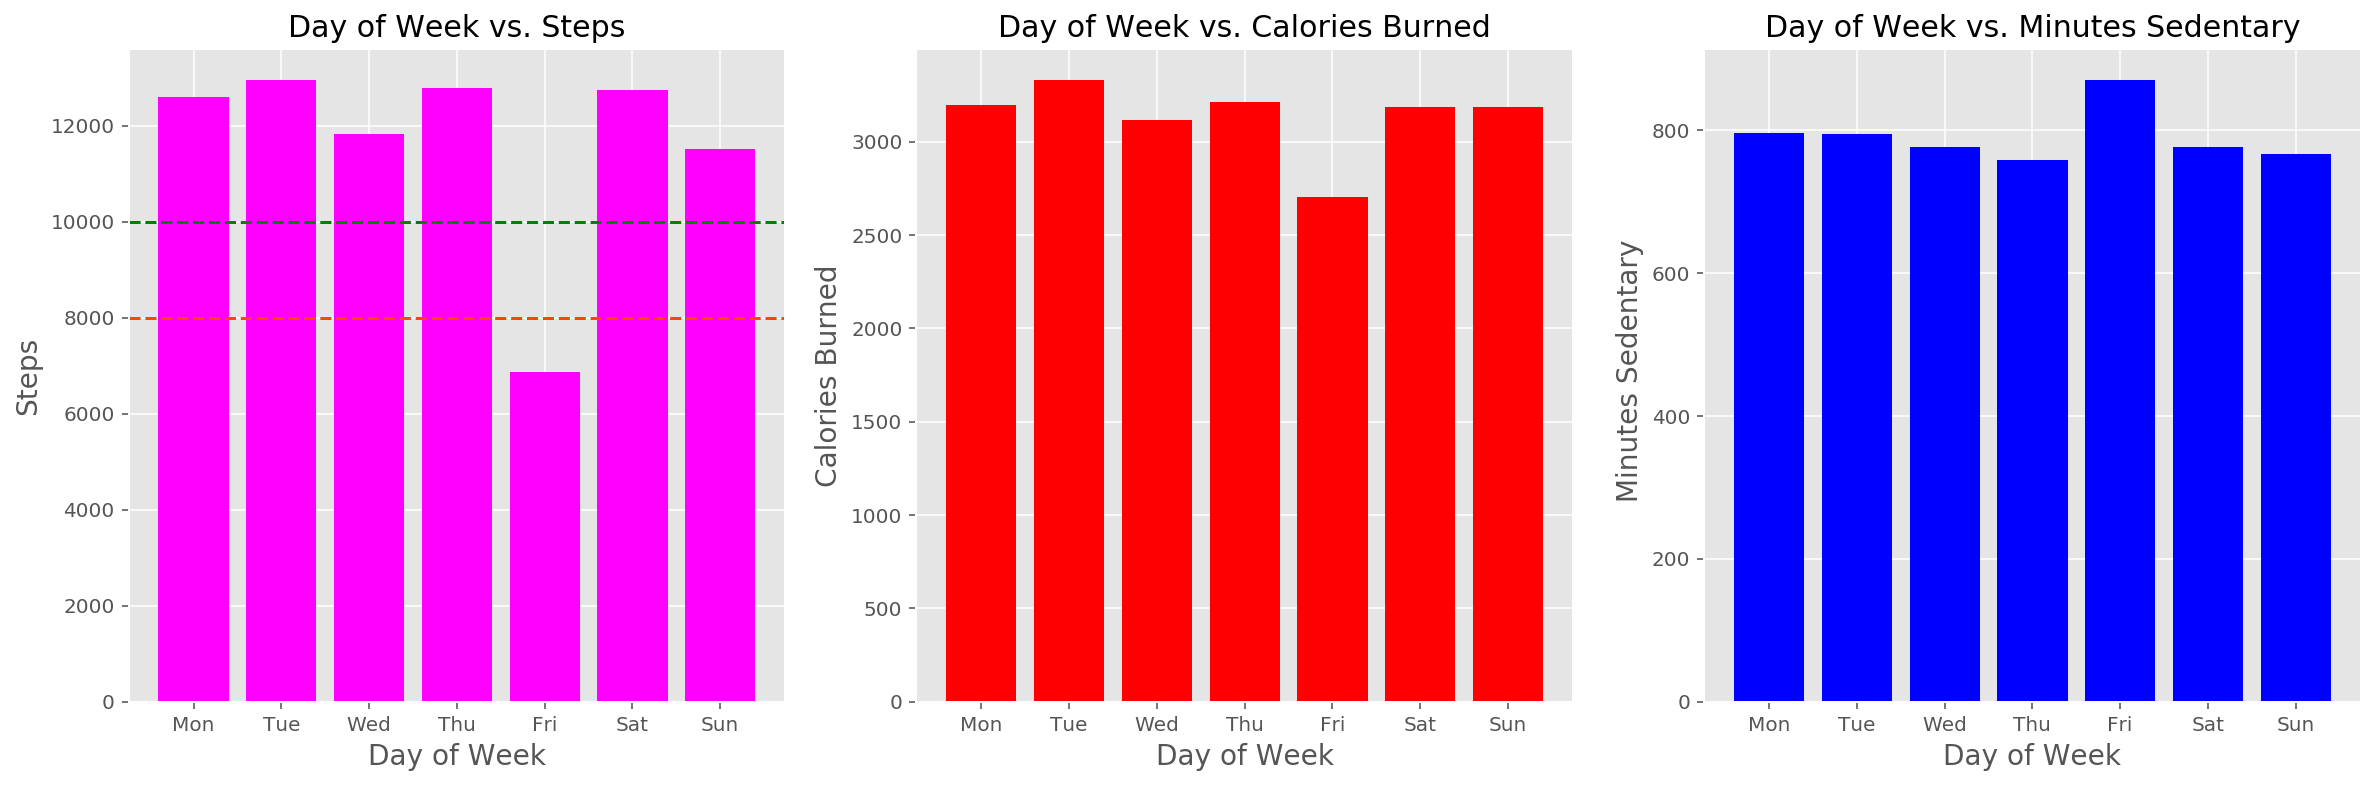

In [100]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Steps'], color='magenta')
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="green", linestyle='--')
ax.set_xticklabels(DayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Calories Burned'], color='red')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
ax2.set_xticklabels(DayCodes)

#############
ax3 = fig.add_subplot(133)
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Minutes Sedentary'], color='blue')
plt.title('Day of Week vs. Minutes Sedentary', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel(' Minutes Sedentary', fontsize=14)
ax3.set_xticklabels(DayCodes)
plt.show()

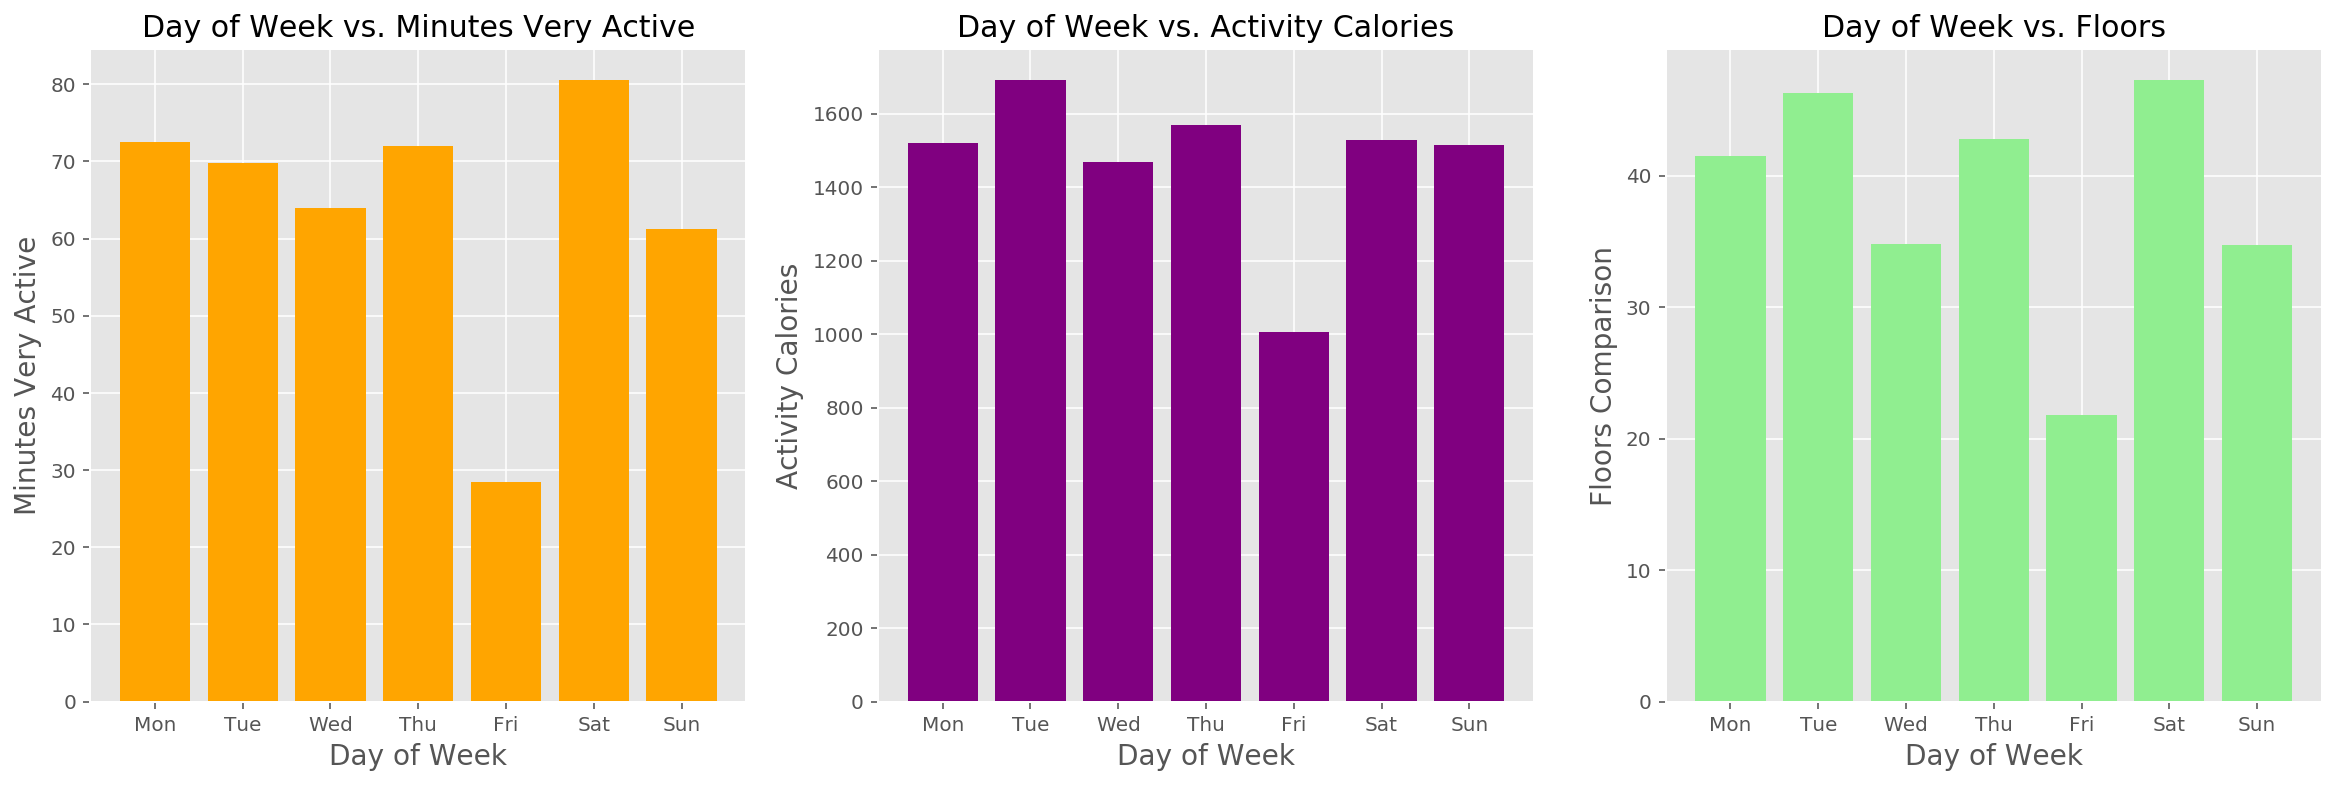

In [102]:
fig = plt.figure(figsize = (20,6))
#############
ax4 = fig.add_subplot(131)
ax4.set_xticklabels(DayCodes)
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Minutes Very Active'], color='orange')
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)


#############
ax5 = fig.add_subplot(132)
ax5.set_xticklabels(DayCodes)
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Activity Calories'], color='purple')
plt.title('Day of Week vs. Activity Calories', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Activity Calories', fontsize=14)


#############
ax6 = fig.add_subplot(133)
ax6.set_xticklabels(DayCodes)
plt.bar(dayofweek_grouped_data.index, dayofweek_grouped_data['Floors'], color='lightgreen')
plt.title('Day of Week vs. Floors', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Floors Comparison', fontsize=14)
plt.show()


Clearly, Friday is a tough day for me. Sedentary minutes are way above  all other days and this says a lot about  the meetings I have on the day. Its also my preparation day for the sabbath on Saturday, thus don't do much. 

### 2. Calories Burned vs Other  Factors

In [106]:
def plot_heatmap(corrmat, correlation_variable, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

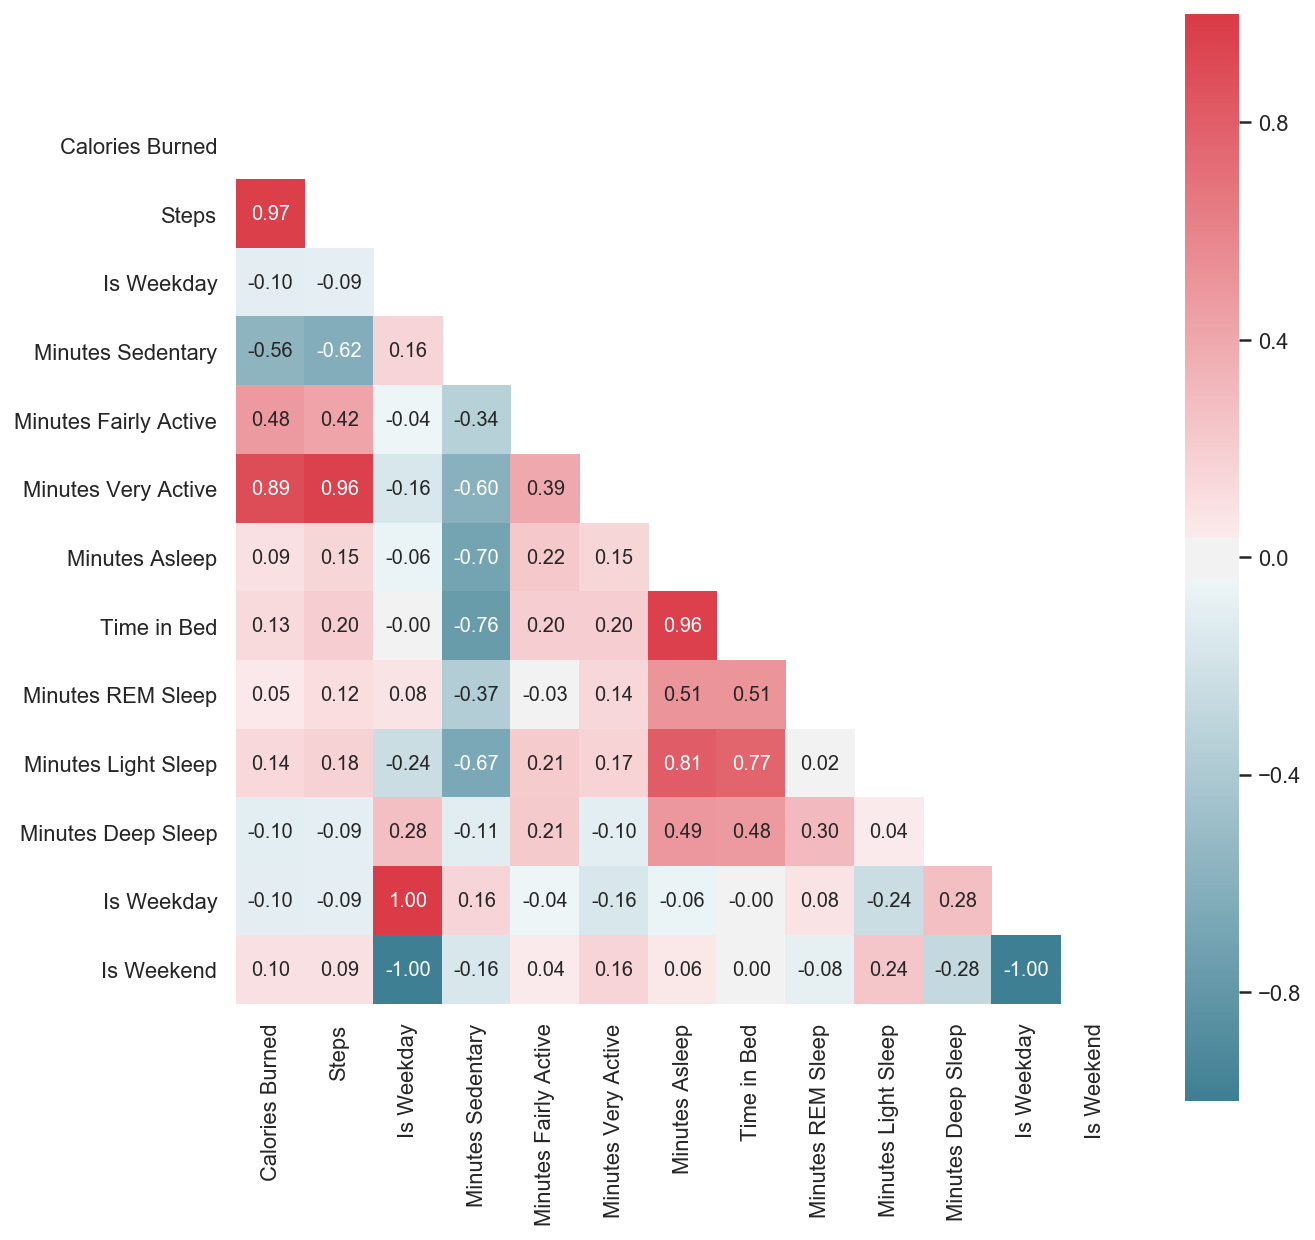

In [108]:
correlation_variable = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekday', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active','Minutes Asleep','Time in Bed','Minutes REM Sleep'
                       ,'Minutes Light Sleep','Minutes Deep Sleep','Is Weekday','Is Weekend']]
plot_heatmap(corrdf_calories.corr(), correlation_variable, '')


As expected, steps and  minutes active were  great factors in relation to calories burned.

### Weight  vs Other Factors

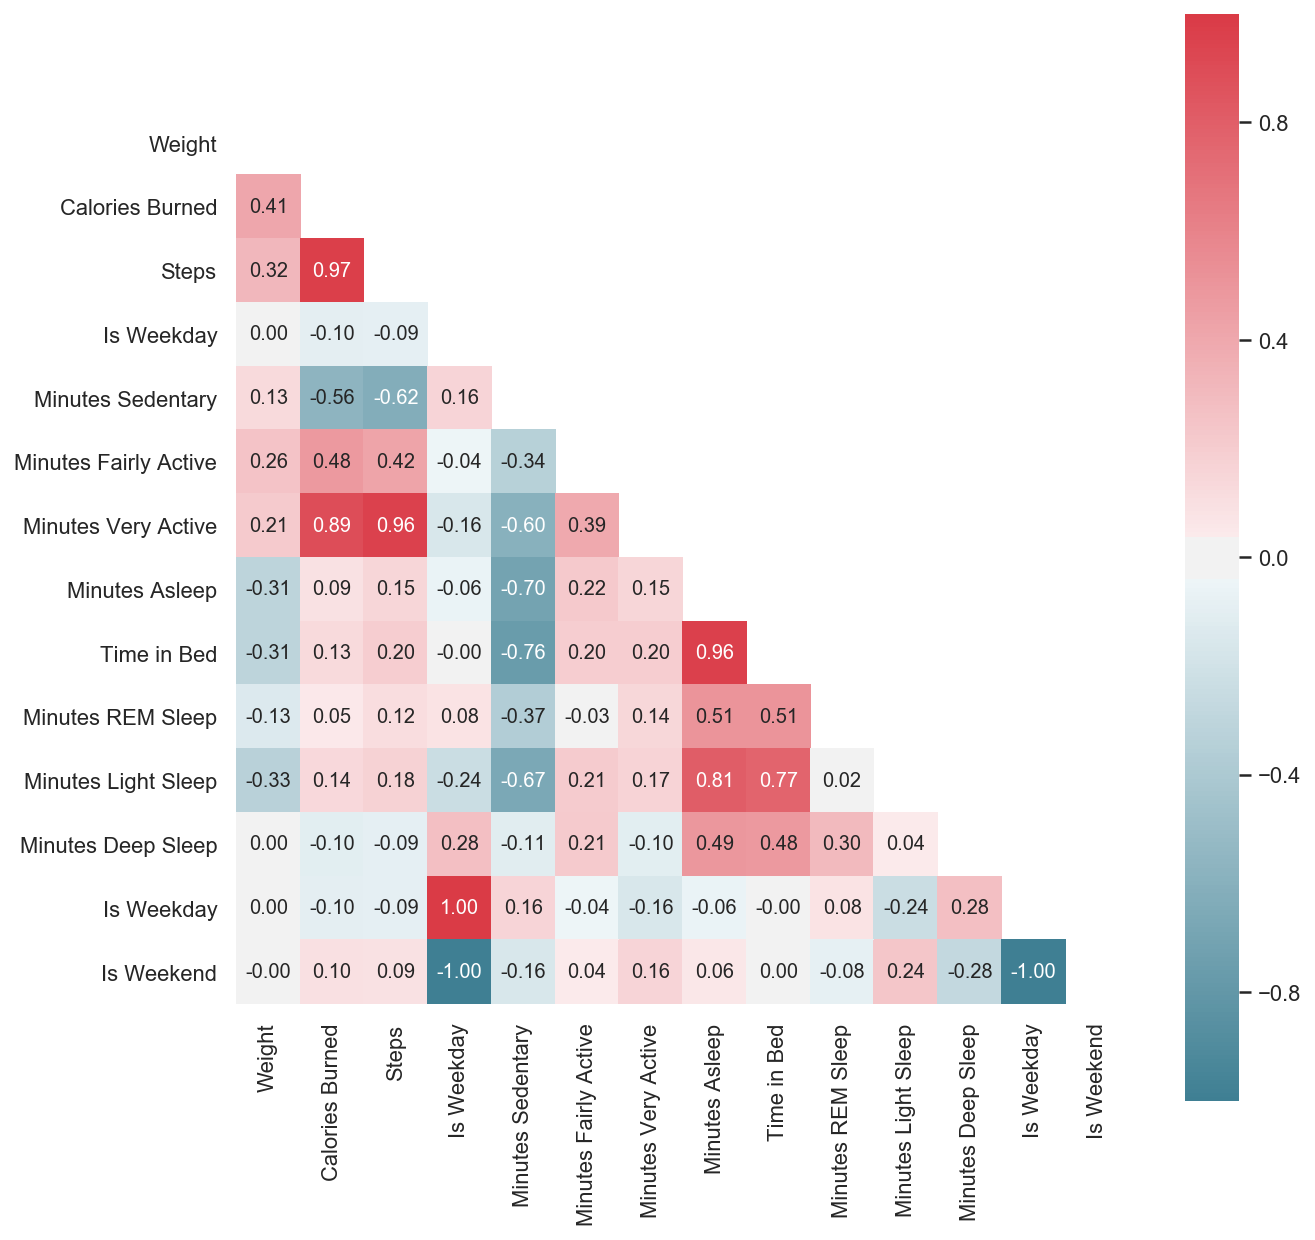

In [154]:
correlation_variable = 'Weight'
corrdf_calories = data[['Weight','Calories Burned','Steps', 'Is Weekday', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active','Minutes Asleep','Time in Bed','Minutes REM Sleep'
                       ,'Minutes Light Sleep','Minutes Deep Sleep','Is Weekday','Is Weekend']]
plot_heatmap(corrdf_calories.corr(), correlation_variable, '')

Clearly calories burned as expected contributed more to weight loss in my case during this time.

## Sleep Analysis

17 evidence-based tips to sleep better at night are detailed here https://www.healthline.com/nutrition/17-tips-to-sleep-better. I had to look at a few factors in this respect, though the assumption is  that  I may not  have slept  the standard 7-9 hours a night. Lets see what the  analysis  says:-
 


### 1. Types of Sleep Analysis

As per this  article https://help.fitbit.com/articles/en_US/Help_article/2163, Fitbit  devices with heart-rate tracking (except Fitbit Charge HR or Fitbit Surge) can be used to track sleeping habits categorized in sleep stages. When one is asleep, the  body typically goes through sleep cycles that last about  90 minutes on average. They alternate  between light and deep sleep. Sleep stages are  below:-

1. **Light Sleep** - *This serves as the entry point into sleep each night as your body unwinds and slows down. This stage typically begins within minutes of falling asleep. During the early part of light sleep, you may drift between being awake and asleep.*
2. **Deep Sleep** -*Deep sleep typically occurs in the first few hours of sleep. When you wake up feeling refreshed in the morning, you’re likely to have experienced solid periods of deep sleep during the previous night.* 
3. **REM Sleep** -*The first phase of REM sleep typically occurs after you’ve had an initial stage of deep sleep. You generally stay in REM sleep for a longer period of time during sleep cycles occurring in the second half of the night. During this final stage of sleep, your brain becomes more active. Dreams mainly occur during REM sleep, and your eyes move quickly in different directions. Heart rate increases and breathing becomes more irregular. In principle, muscles below the neck are inactive to avoid acting out dreams.* 


In [116]:
Sleep_data = data[["Date","Minutes Asleep","Minutes Awake","Number of Awakenings","Time in Bed","Minutes REM Sleep","Minutes Light Sleep",
                   "Minutes Deep Sleep","Day_of_week","Is Weekend"]]

In [117]:
Sleep_data.head()

,Date,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Day_of_week,Is Weekend
0,2020-03-25,375,71,28,446,82,207,86,2,False
1,2020-03-26,312,62,25,374,54,165,93,3,False
2,2020-03-27,274,40,16,314,37,159,78,4,False
3,2020-03-28,268,41,15,309,39,180,49,5,True
4,2020-03-29,400,39,30,439,75,223,102,6,True


[]

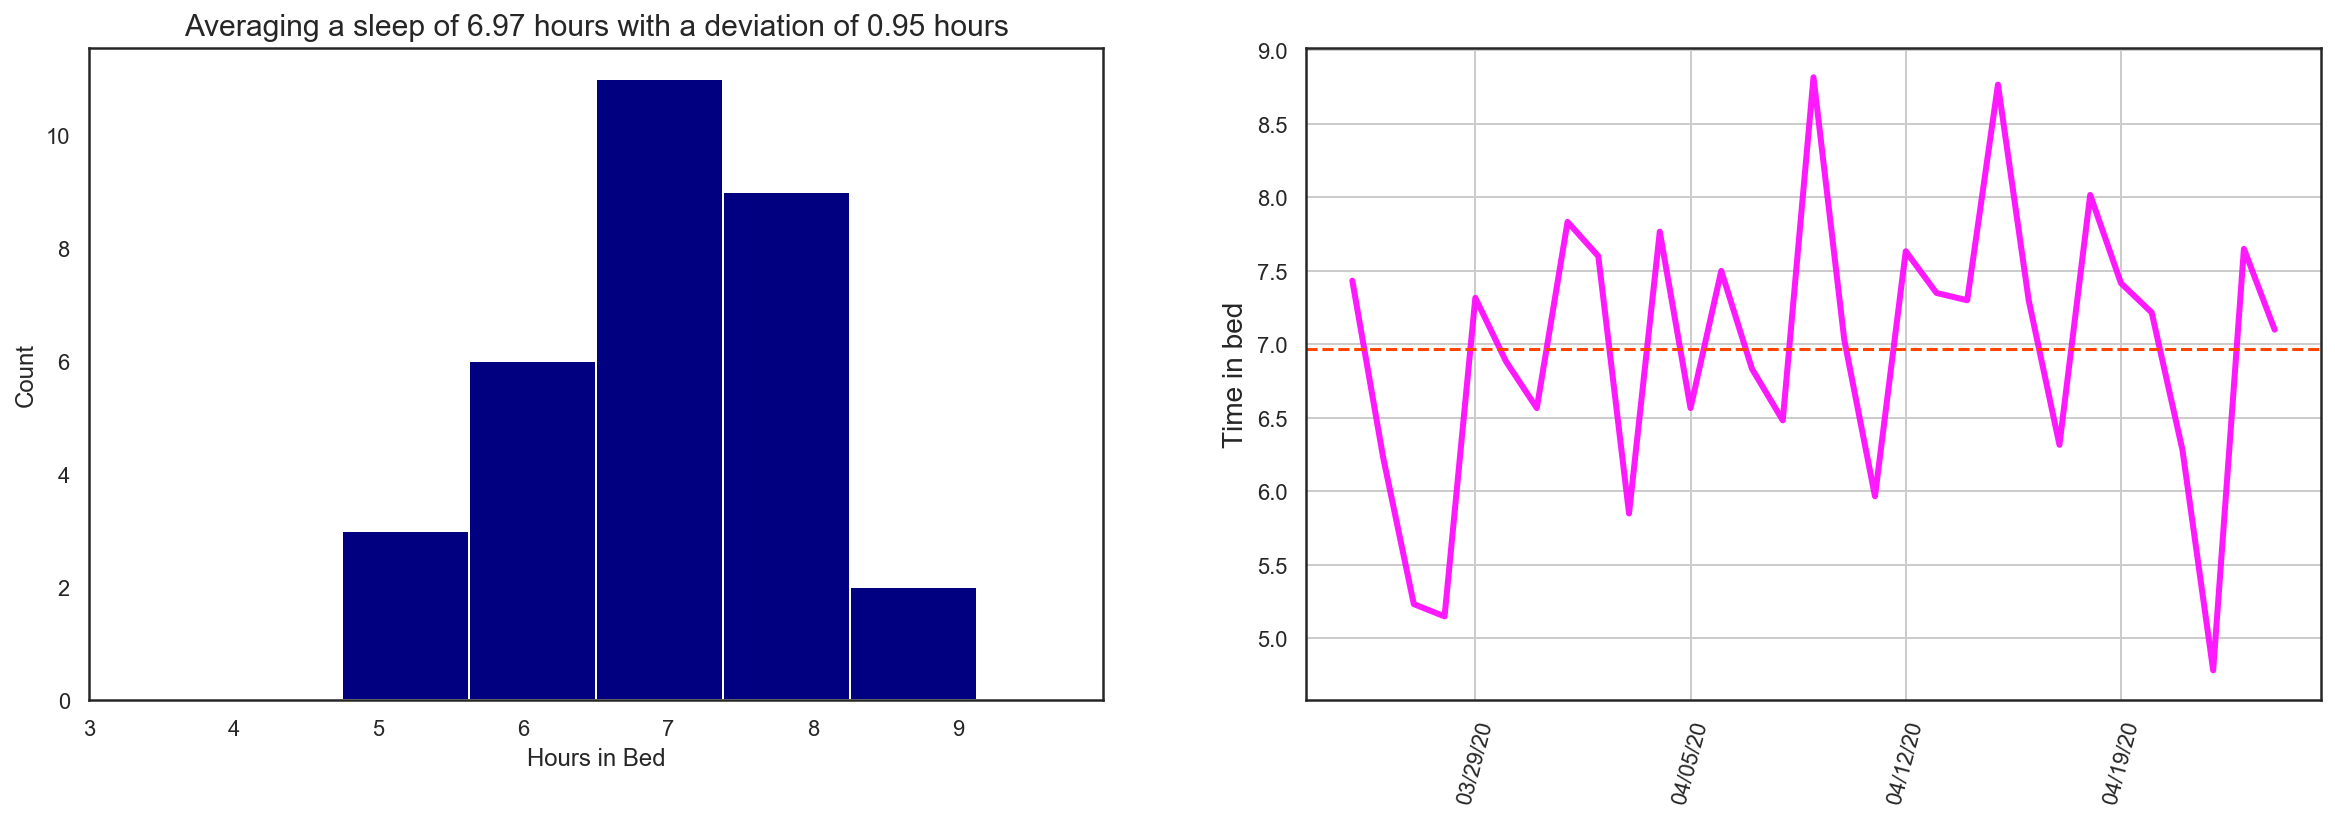

In [121]:
import matplotlib.dates as mdates

hours_in_bed = Sleep_data['Time in Bed']/60
sleep_pattern = pd.DataFrame(Sleep_data['Time in Bed']/60).describe().transpose()
average_sleep_hours = round(sleep_pattern.at['Time in Bed','mean'],2)
summary = 'Averaging a sleep of {} hours with a deviation of {} hours'.format(average_sleep_hours, round(sleep_pattern.at['Time in Bed','std'],2))

fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
plt.hist(hours_in_bed, bins = 8, range = (3, 10), color="navy")
plt.xlim(3, 10)
plt.xticks(range(3, 10))
plt.xlabel('Hours in Bed')
plt.ylabel('Count');
plt.title(summary, fontsize=15)

#############

ax2 = fig.add_subplot(122)
plt.plot(Sleep_data['Date'],hours_in_bed, linestyle='-', markersize=10, color='magenta', label='% Light', linewidth=3.0, alpha=0.9)
plt.ylabel('Time in bed', fontsize=14)
ax2.axhline(average_sleep_hours, color="orangered", linestyle='--')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax2.grid(True)
plt.xticks(rotation=75)
plt.plot()

I did well actually. Was in the range of 7 hours. Not bad. 

### 2. Average Sleep Data

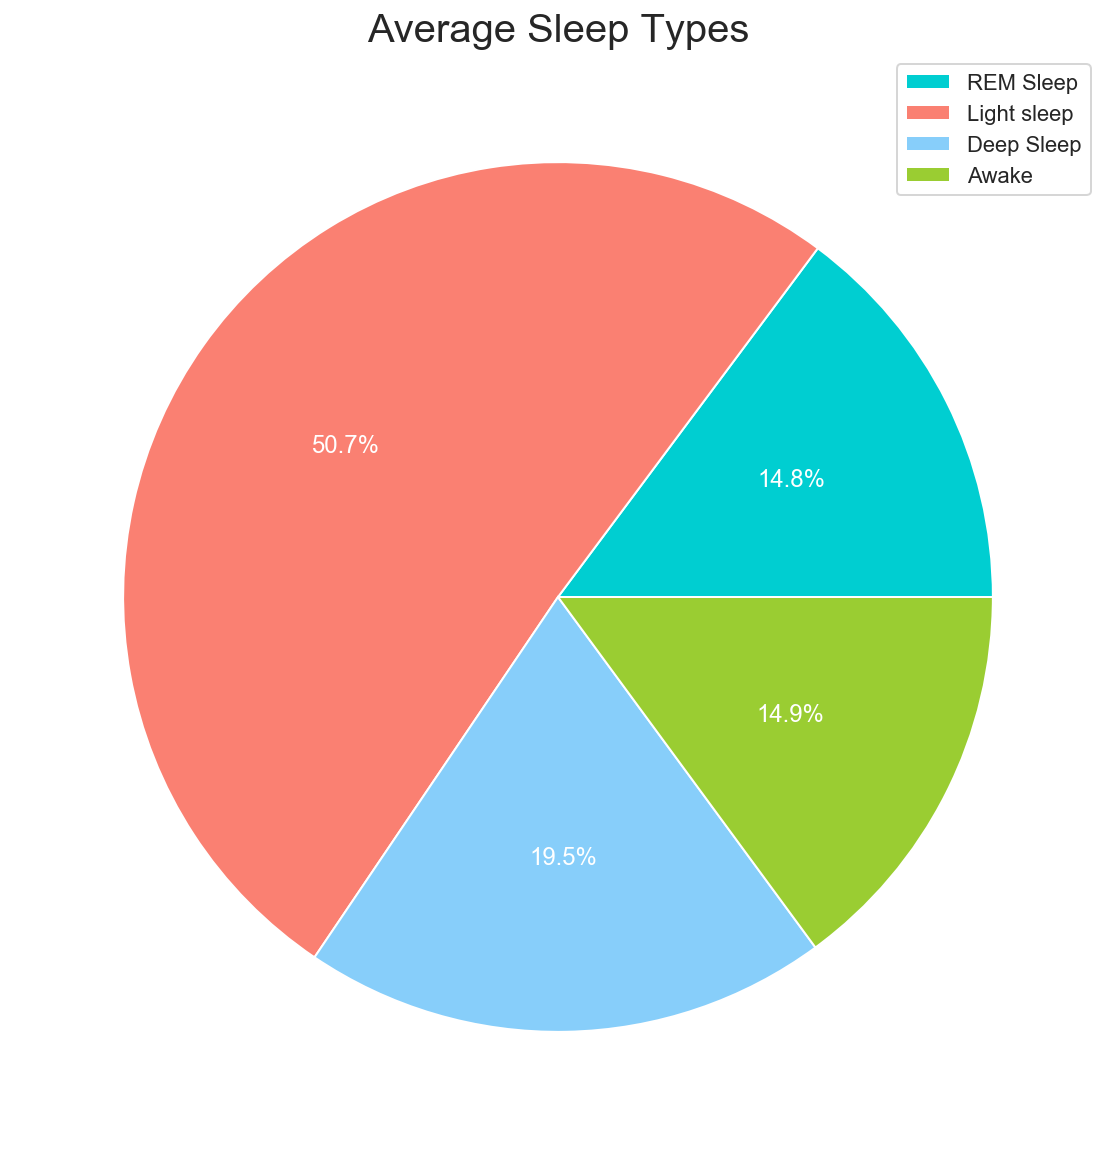

In [126]:
average_sleep = Sleep_data[['Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep', 'Minutes Awake']].mean()

fig = plt.figure(figsize = (20,10))
labels=['REM Sleep', 'Light sleep', 'Deep Sleep', 'Awake']
plt.pie(average_sleep, colors = ['darkturquoise', 'salmon', 'lightskyblue', 'yellowgreen'], autopct='%1.1f%%', labels=labels, textprops=dict(color="w"))
plt.title('Average Sleep Types', fontsize=20)
plt.legend()
plt.show()

### Amount  of Sleep vs Sleep Stages.
Does the time taken slept attain more deep or REM sleep?

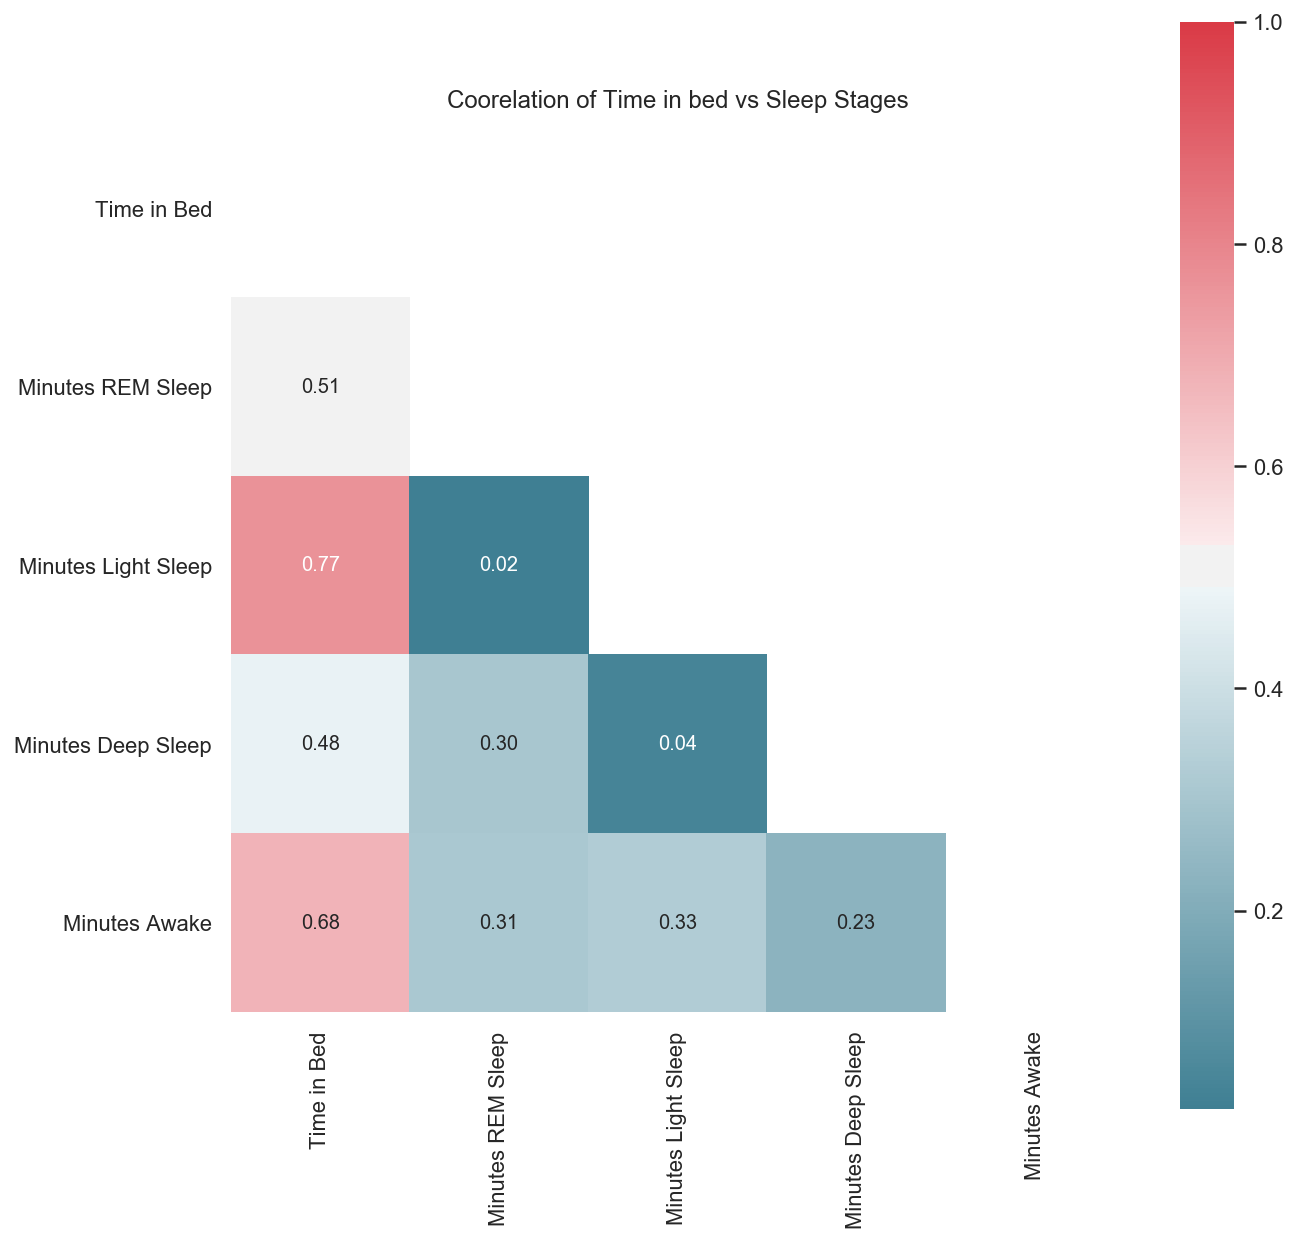

,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Minutes Awake
Time in Bed,1.000000,0.514556,0.766394,0.476907,0.675662
Minutes REM Sleep,0.514556,1.000000,0.021232,0.303071,0.310203
Minutes Light Sleep,0.766394,0.021232,1.000000,0.043124,0.327146
Minutes Deep Sleep,0.476907,0.303071,0.043124,1.000000,0.231092
Minutes Awake,0.675662,0.310203,0.327146,0.231092,1.000000


In [177]:
corrdf_sleep_types = Sleep_data[['Time in Bed','Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep', 'Minutes Awake']].corr().abs()
plot_heatmap(corrdf_sleep_types, correlation_variable, 'Coorelation of Time in bed vs Sleep Stages')
corrdf_sleep_types

### 3. Did I sleep better on Specific Days during the lockdown period

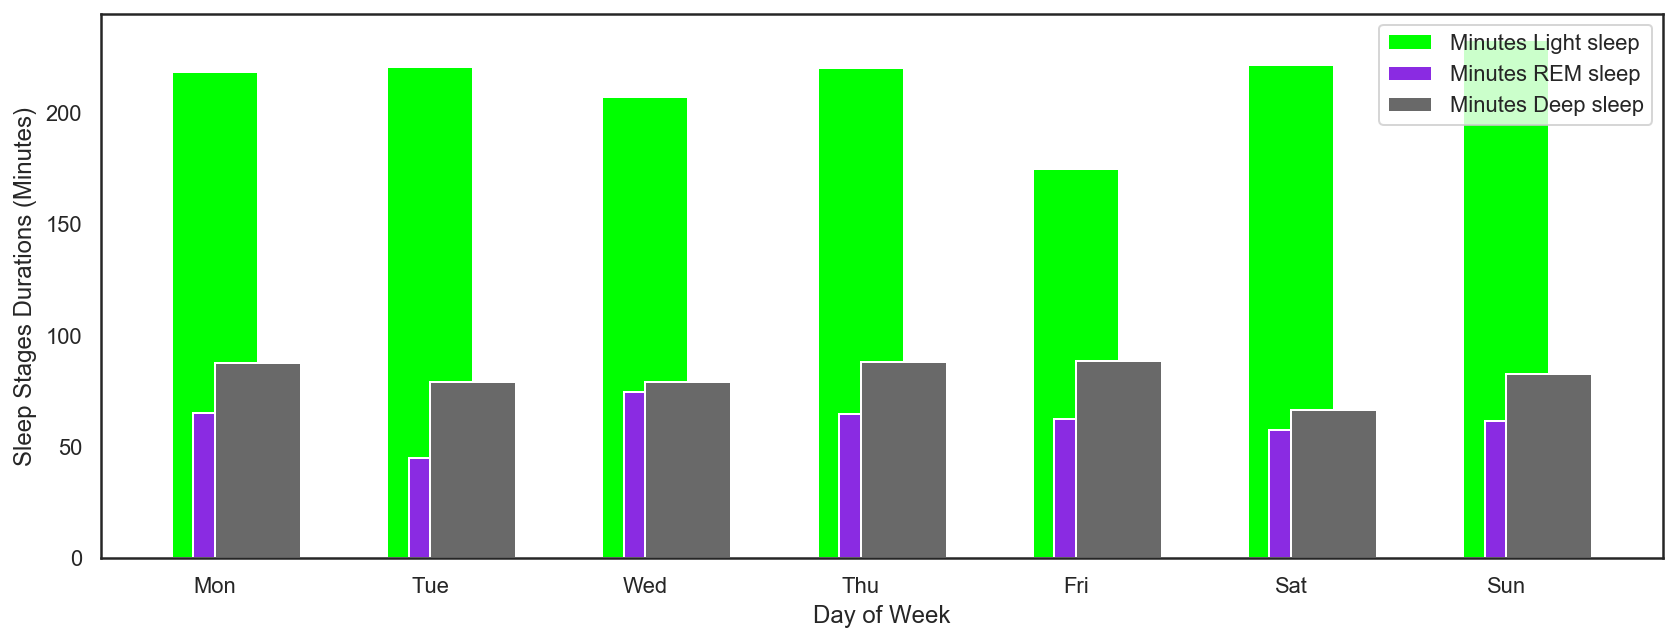

In [136]:
fig = plt.figure(figsize = (14,5))
plt.bar((dayofweek_grouped_data.index), dayofweek_grouped_data['Minutes Light Sleep'],width = 0.4, color='lime', label="Minutes Light sleep", tick_label=DayCodes[1:])
plt.bar((dayofweek_grouped_data.index + 0.1), dayofweek_grouped_data['Minutes REM Sleep'], width = 0.4, color='blueviolet', label="Minutes REM sleep")
plt.bar((dayofweek_grouped_data.index + 0.2), dayofweek_grouped_data['Minutes Deep Sleep'], width = 0.4, color='dimgrey', label="Minutes Deep sleep")
plt.xlabel('Day of Week')
plt.ylabel('Sleep Stages Durations (Minutes)')
plt.legend()

Light sleep was dorminant on Sundays. I slept better(deep sleep) on Thursdays, Fridays and  Mondays(ironic)

### 4. Sleep time variations across the days of the week

Text(0.5, 1.0, 'Sleep Times Variations  Duration Across Days of the Week ')

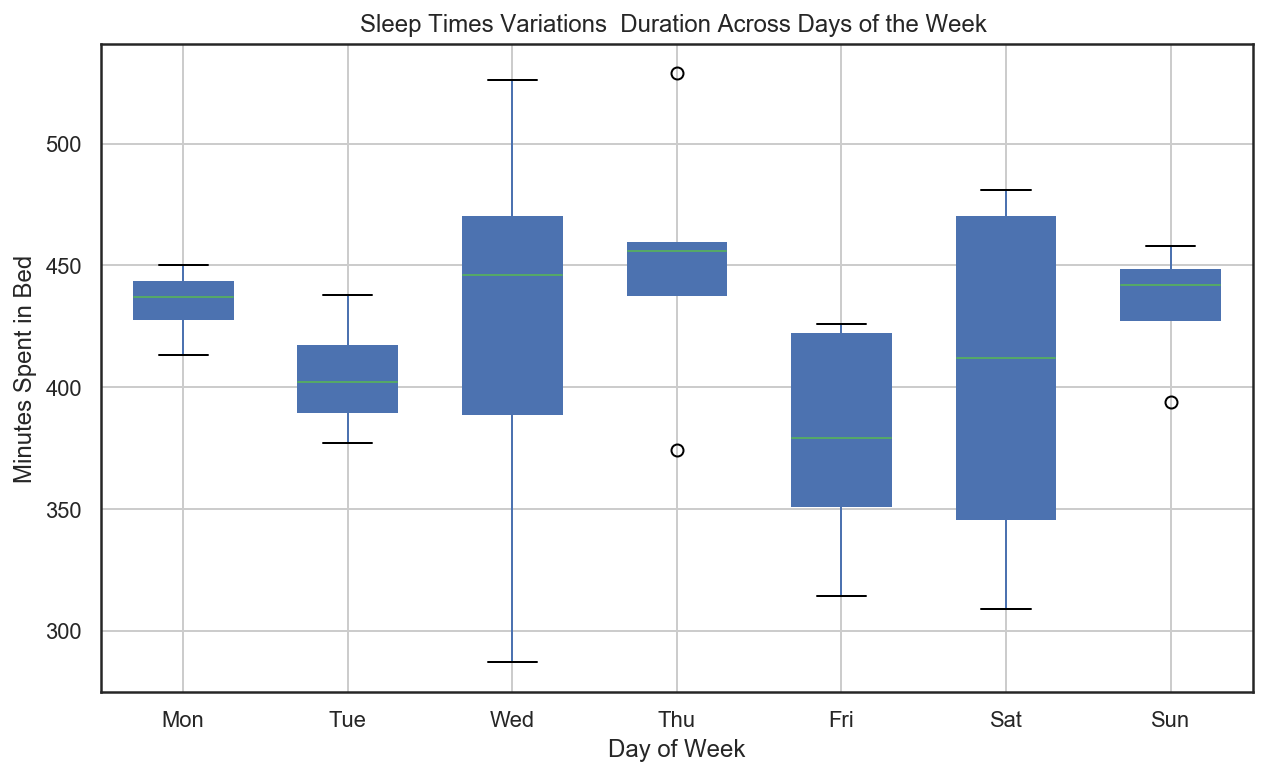

In [176]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#fig = plt.figure(figsize = (20,10))
ax = Sleep_data.boxplot(column = 'Time in Bed', by = 'Day_of_week',widths = 0.6, patch_artist = True)
ax.set_xticklabels(DayCodes[1:])
plt.ylabel('Minutes Spent in Bed')
plt.xlabel('Day of Week')
plt.suptitle('')
plt.title('Sleep Times Variations  Duration Across Days of the Week ')



### 5. Weight Loss Journey

[]

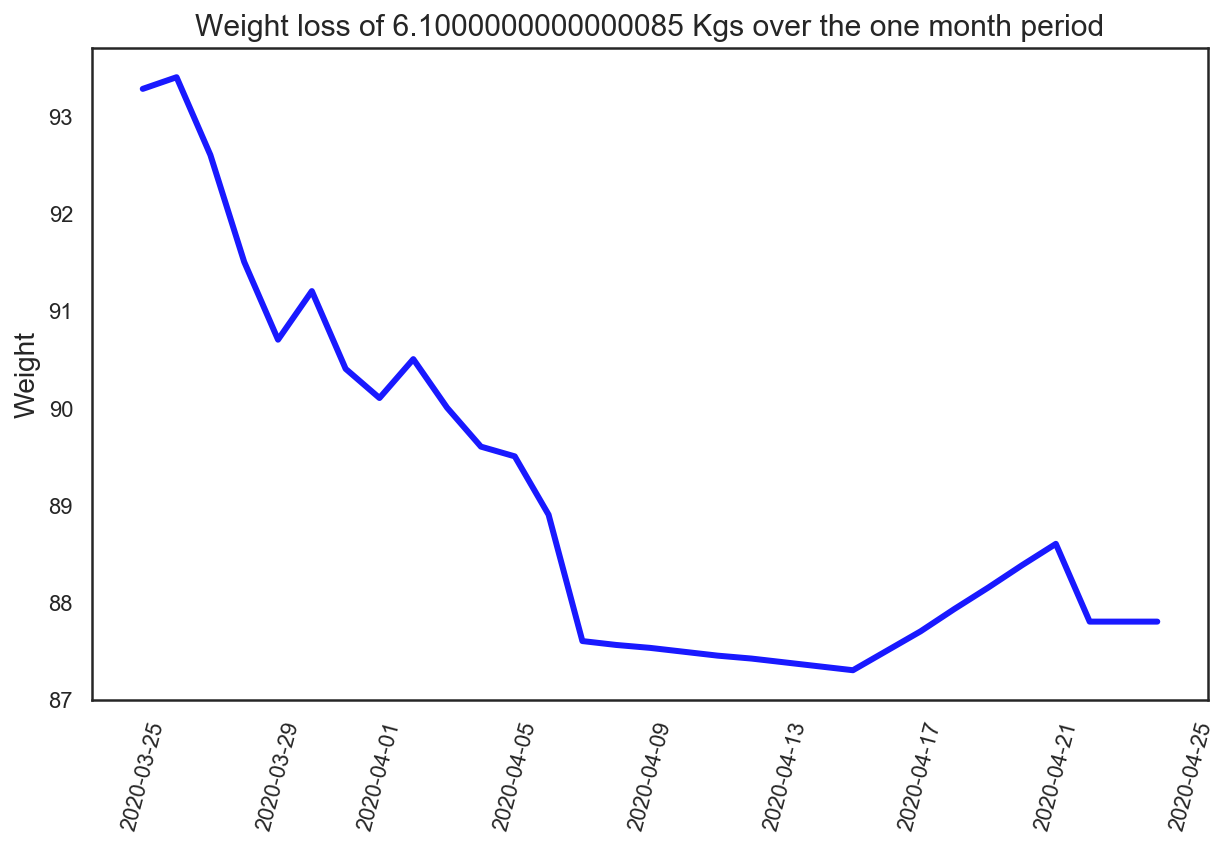

In [174]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
weight_pattern = pd.DataFrame(data['Weight']).describe().transpose()
average_weight = round(weight_pattern.at['Weight','mean'],2)
#summary = 'Weight loss of {} Kgs with a deviation of {} Kgs'.format(average_weight, round(weight_pattern.at['Weight','std'],2))
summary = 'Weight loss of {} Kgs over the one month period'.format(max(data["Weight"]) - min(data["Weight"]))

plt.plot(Sleep_data['Date'],data['Weight'], linestyle='-', markersize=10, color='blue', label='% Light', linewidth=3.0, alpha=0.9)
plt.ylabel('Weight', fontsize=14)
ax2.axhline(average_weight, color="blue", linestyle='--')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax2.grid(True)
plt.xticks(rotation=75)
plt.title(summary, fontsize=15)
plt.plot()
